# Unit 5 - Example 1

Import of Python libraries

In [1]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle code"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Exercise

The results of a test of intelligence (intelligenc quotient = IQ) are interpreted often as a normal distributed stochastic variable. In Psychology the assumption is that the expected value of the IQ is 100 and the standard deviation is 15.  

What is the probability, that a person has an IQ greater than 110 points?  
What is the probability, that a person has an IQ below 110 points?  
What is the probability, that a person has an IQ between 85 and 115 points?

# Solution

In [2]:
from scipy.stats import norm

Given $$\mu = 100$$ and $$\sigma = 15$$ x is 110.

*z-Transformation:*
$$ Z = \frac{(X-\mu)}{\sigma} $$

**What is the probability, that a person has an IQ greater than 110 points?**

$$ P(Z > z) = 1 - F_s(z) $$
given z = 110

In [3]:
# z-Transformation
z = (110 - 100) / 15
print(z)

0.6666666666666666


In [4]:
# F(z)
norm.cdf(z)

0.7475074624530771

In [5]:
# 1 - F(z)
1 - norm.cdf(z)

0.2524925375469229

In [6]:
## Direct computation in Python
# 1 - norm.cdf(x=110, loc=100, scale=15)

**What is the probability, that a person has an IQ below 110 points?**

$$ P(Z \le z) = F_{St}(z) $$ given z = 110

In [7]:
# z-Transformation
z = (110 - 100) / 15
print(z)

0.6666666666666666


In [8]:
## P(X < z)
norm.cdf(z)

0.7475074624530771

In [9]:
## Direct computation in Python
# norm.cdf(x=110, loc=100, scale=15)

**What is the probability, that a person has an IQ between 85 and 115 points?**

$$ P(a < Z \le b) = F_{St}(b) - F_{St}(a) $$
given a = 85 and b = 115.

In [10]:
# z-Transformation
z_a = (85 - 100) / 15
print(z_a)

-1.0


In [11]:
# z-Transformation
z_b = (115 - 100) / 15
print(z_b)

1.0


In [12]:
## F(b)
norm.cdf(z_b)

0.8413447460685429

In [13]:
## F(a)
norm.cdf(z_a)

0.15865525393145707

In [14]:
## P(a < X <= b)
norm.cdf(z_b) - norm.cdf(z_a)

0.6826894921370859

In [15]:
## Direct computation in Python
# norm.cdf(x=115, loc=100, scale=15) - norm.cdf(x=85, loc=100, scale=15)

# Chart: Cumulative Distribution Function of the Standard Normal Distribution

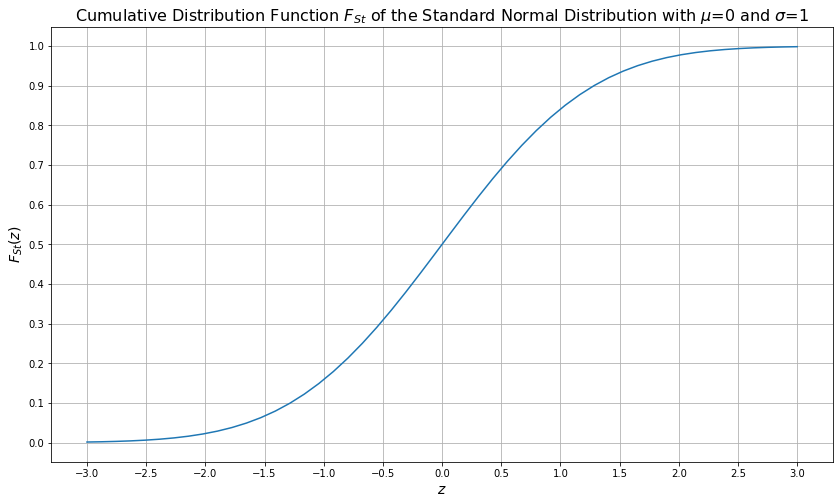

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_values = np.linspace(-3.0, 3.0, 50)
y_values = [norm.cdf(i) for i in x_values]

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_values, y_values)

ax.set_title('Cumulative Distribution Function $F_{St}$ of the Standard Normal Distribution with $\mu$=0 and $\sigma$=1', size=16)
ax.set_xlabel('$z$', size=14)
ax.set_ylabel('$F_{St}(z)$', size=14)

ax.grid(True, axis='both')

ax.set_xticks(np.linspace(-3, 3, 13))
#ax.set_xticklabels(x_labels)

ax.set_yticks(np.linspace(0.0, 1.0, 11))

## Wert neben Linie schreiben
#for x, y in zip(x_values, y_values):
#    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

#major_ticks = np.arange(0, 1.1, 0.1)    
#ax.set_yticks(major_ticks)
    
plt.show()
toggle_code()

## Chart: Probability Density Function of the "IQ" Normal Distribution

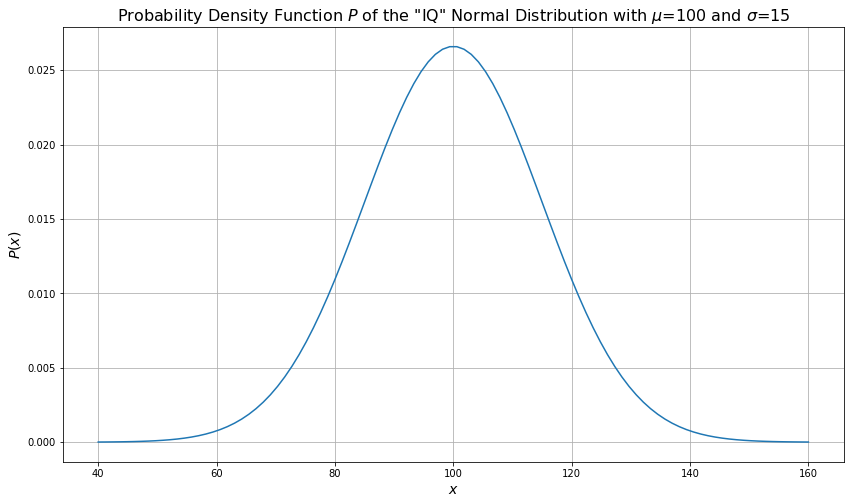

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_values = np.linspace(40, 160, 100)
y_values = [norm.pdf(i, loc=100, scale=15) for i in x_values]

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(x_values, y_values)

ax.set_title('Probability Density Function $P$ of the "IQ" Normal Distribution with $\mu$=100 and $\sigma$=15', size=16)
ax.set_xlabel('$x$', size=14)
ax.set_ylabel('$P(x)$', size=14)

ax.grid(True, axis='both')

#ax.set_xticks(np.linspace(-3, 3, 13))
#ax.set_xticklabels(x_labels)

#ax.set_yticks(np.linspace(0.0, 1.0, 11))

## Wert neben Linie schreiben
#for x, y in zip(x_values, y_values):
#    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

#major_ticks = np.arange(0, 1.1, 0.1)    
#ax.set_yticks(major_ticks)
    
plt.show()
toggle_code()

## Interactive Chart
### Computation of the probability, that the IQ lies between the lower bound a and the upper bound b

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats import norm

%matplotlib inline

def make_plot(a_b, sigma):

    mu = 100
    a = a_b[0]
    b = a_b[1]
    
    def y(x):
        return norm.cdf(x, loc=mu, scale=sigma)

    x_values = np.linspace(40, 160, 100)
    y_values = list(map(y, x_values))

    fig, ax = plt.subplots(figsize=(14, 8))

    ax.plot(x_values, y_values)

    title = 'Cumulative Normal Distribution $F$ of the Normal Distribution with $\mu$=100 and $\sigma$={}, a = {}, b = {}'.format(sigma, a, b)
    ax.set_title(title, size=16)
    ax.set_xlabel('$x$', size=14)
    ax.set_ylabel('$F(x)$', size=14)

    ax.grid(True, axis='both')

    ax.set_xticks(np.linspace(40, 160, 13))
    #ax.set_xticklabels(x_labels)

    ax.set_yticks(np.linspace(0.0, 1.0, 11))

    ## Wert neben Linie schreiben
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(str(y), xy=(x, y - 0.04), size=14)

    #major_ticks = np.arange(0, 1.1, 0.1)    
    #ax.set_yticks(major_ticks)

    ## Linie auf a
    plt.vlines(a, 0, y(a), color='black', linewidth=1.0)
    
    ## Linie auf b
    plt.vlines(b, 0, y(b), color='black', linewidth=1.0)


    ## Doppelpfeil für Ergebnisbereich
    plt.annotate(
        s='',
        xytext=(40, y(a)),
        xy=(40, y(b)),
        arrowprops={'arrowstyle': '<->', 'color': 'green', 'linewidth': 2.0}
    )

    ## Text für Ergebnis
    plt.annotate(
        'Result: {:.4f} - {:.4f} = {:.4f}'.format(y(b), y(a), y(b) - y(a)),
        size=14,
        xy=(45, 0.55)
    )

    ## Text für Ergebnis Formel
    result = r'    $ P({} \leq X < {}) $ = {:.4f}'.format(a, b, y(b) - y(a))
    plt.annotate(
        result,
        size=16,
        color='green',
        xy=(45, 0.4)
    )

    ## Pfeil auf y(a)
    plt.annotate('', xytext=(a, y(a)), xy=(plt.xlim()[0], y(a)),
                 arrowprops={'arrowstyle': '->', 'color': 'black'})

    ## Pfeil auf y(b)
    plt.annotate('', xytext=(b, y(b)), xy=(plt.xlim()[0], y(b)),
                 arrowprops={'arrowstyle': '->', 'color': 'black'})


    ## ==================================================
    #print(plt.ylim())
    #print(plt.xlim())
    plt.ylim(-0.05, 1.05)

toggle_code()

In [20]:
interactive(
    make_plot, 
    a_b=widgets.IntRangeSlider(value=[85, 115], min=40, max=160, step=5, continuous_update=False, description='a and b'),
    sigma=widgets.IntSlider(value=15, min=10, max=20, step=1, continuous_update=False, description='$\sigma$'))

interactive(children=(IntRangeSlider(value=(85, 115), continuous_update=False, description='a and b', max=160,…